In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV en dataframes
happiness = pd.read_csv('Happiness_report.csv')
metadata = pd.read_csv('Metadata.csv')

# Visualiza los primeros registros para confirmar la carga
happiness.head()
metadata.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [3]:
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)
mexico


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


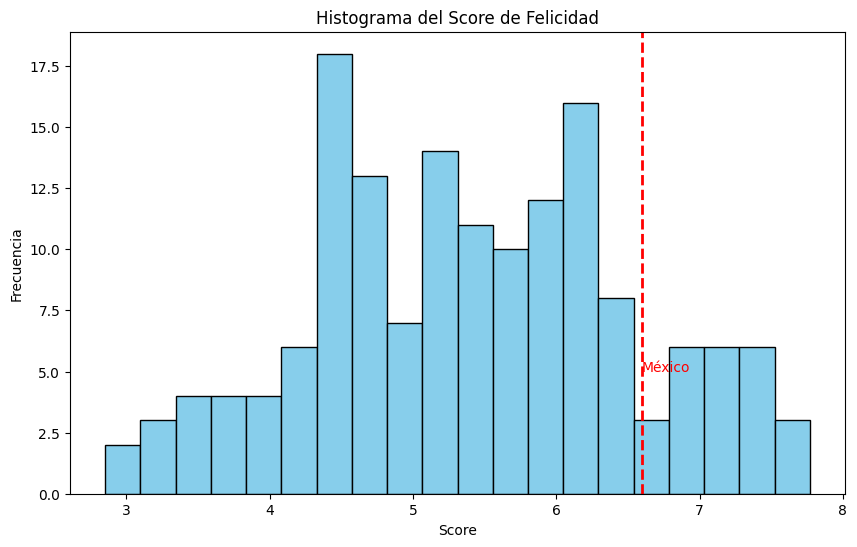

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mexico['Score'].values[0], color='red', linestyle='dashed', linewidth=2)
plt.text(mexico['Score'].values[0], 5, 'México', color='red')
plt.title('Histograma del Score de Felicidad')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()


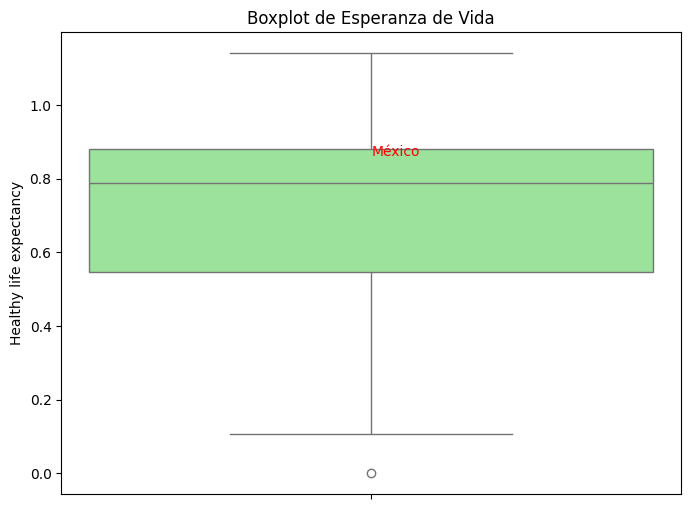

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=happiness, y='Healthy life expectancy', color='lightgreen')
plt.scatter(y=mexico['Healthy life expectancy'].values[0], x=[0], color='red')
plt.text(0, mexico['Healthy life expectancy'].values[0], 'México', color='red')
plt.title('Boxplot de Esperanza de Vida')
plt.show()


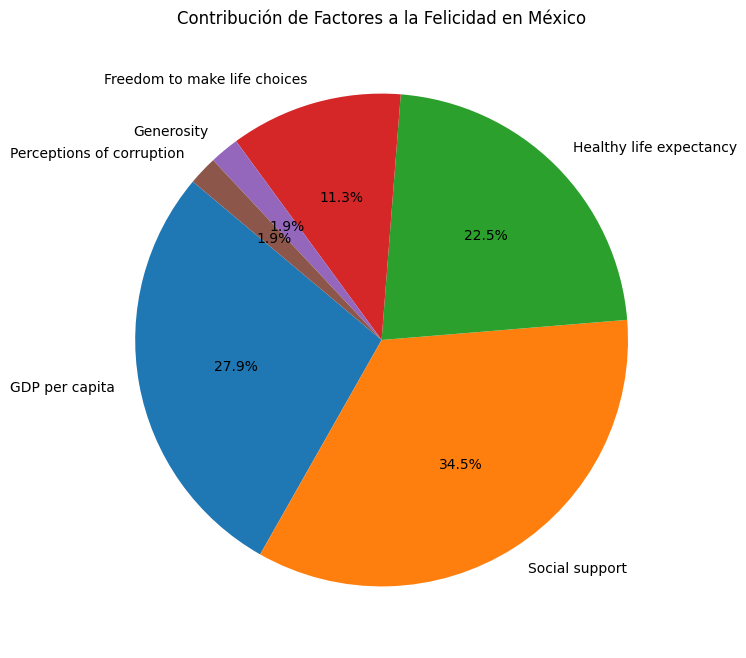

In [6]:
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

valores = mexico[factores].values[0]

plt.figure(figsize=(8, 8))
plt.pie(valores, labels=factores, autopct='%1.1f%%', startangle=140)
plt.title('Contribución de Factores a la Felicidad en México')
plt.show()



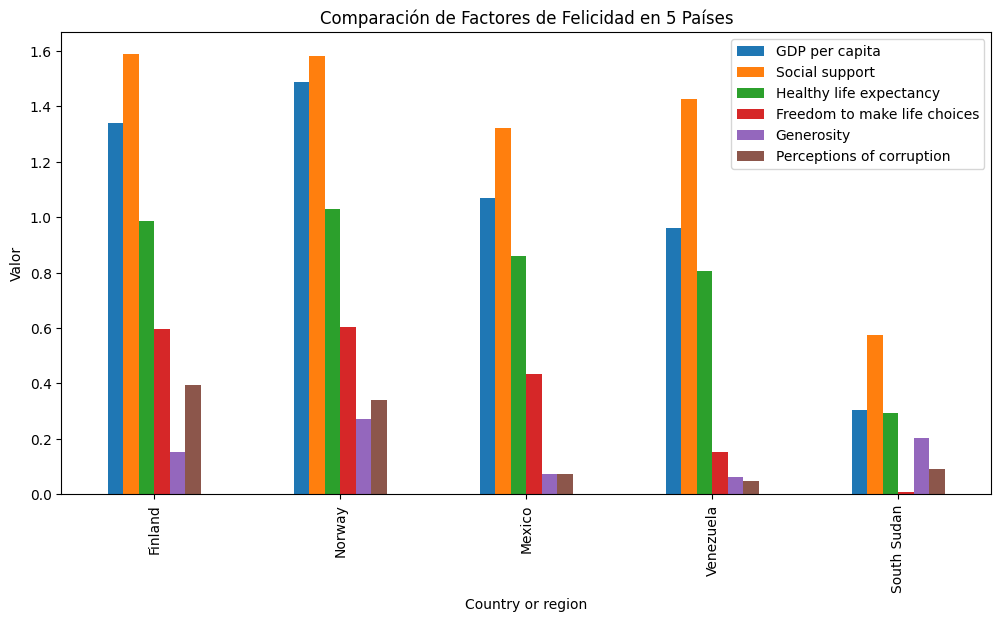

In [7]:
paises = ['Finland', 'South Sudan', 'Mexico', 'Norway', 'Venezuela']
subset = happiness[happiness['Country or region'].isin(paises)].set_index('Country or region')

subset[factores].plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Factores de Felicidad en 5 Países')
plt.ylabel('Valor')
plt.show()


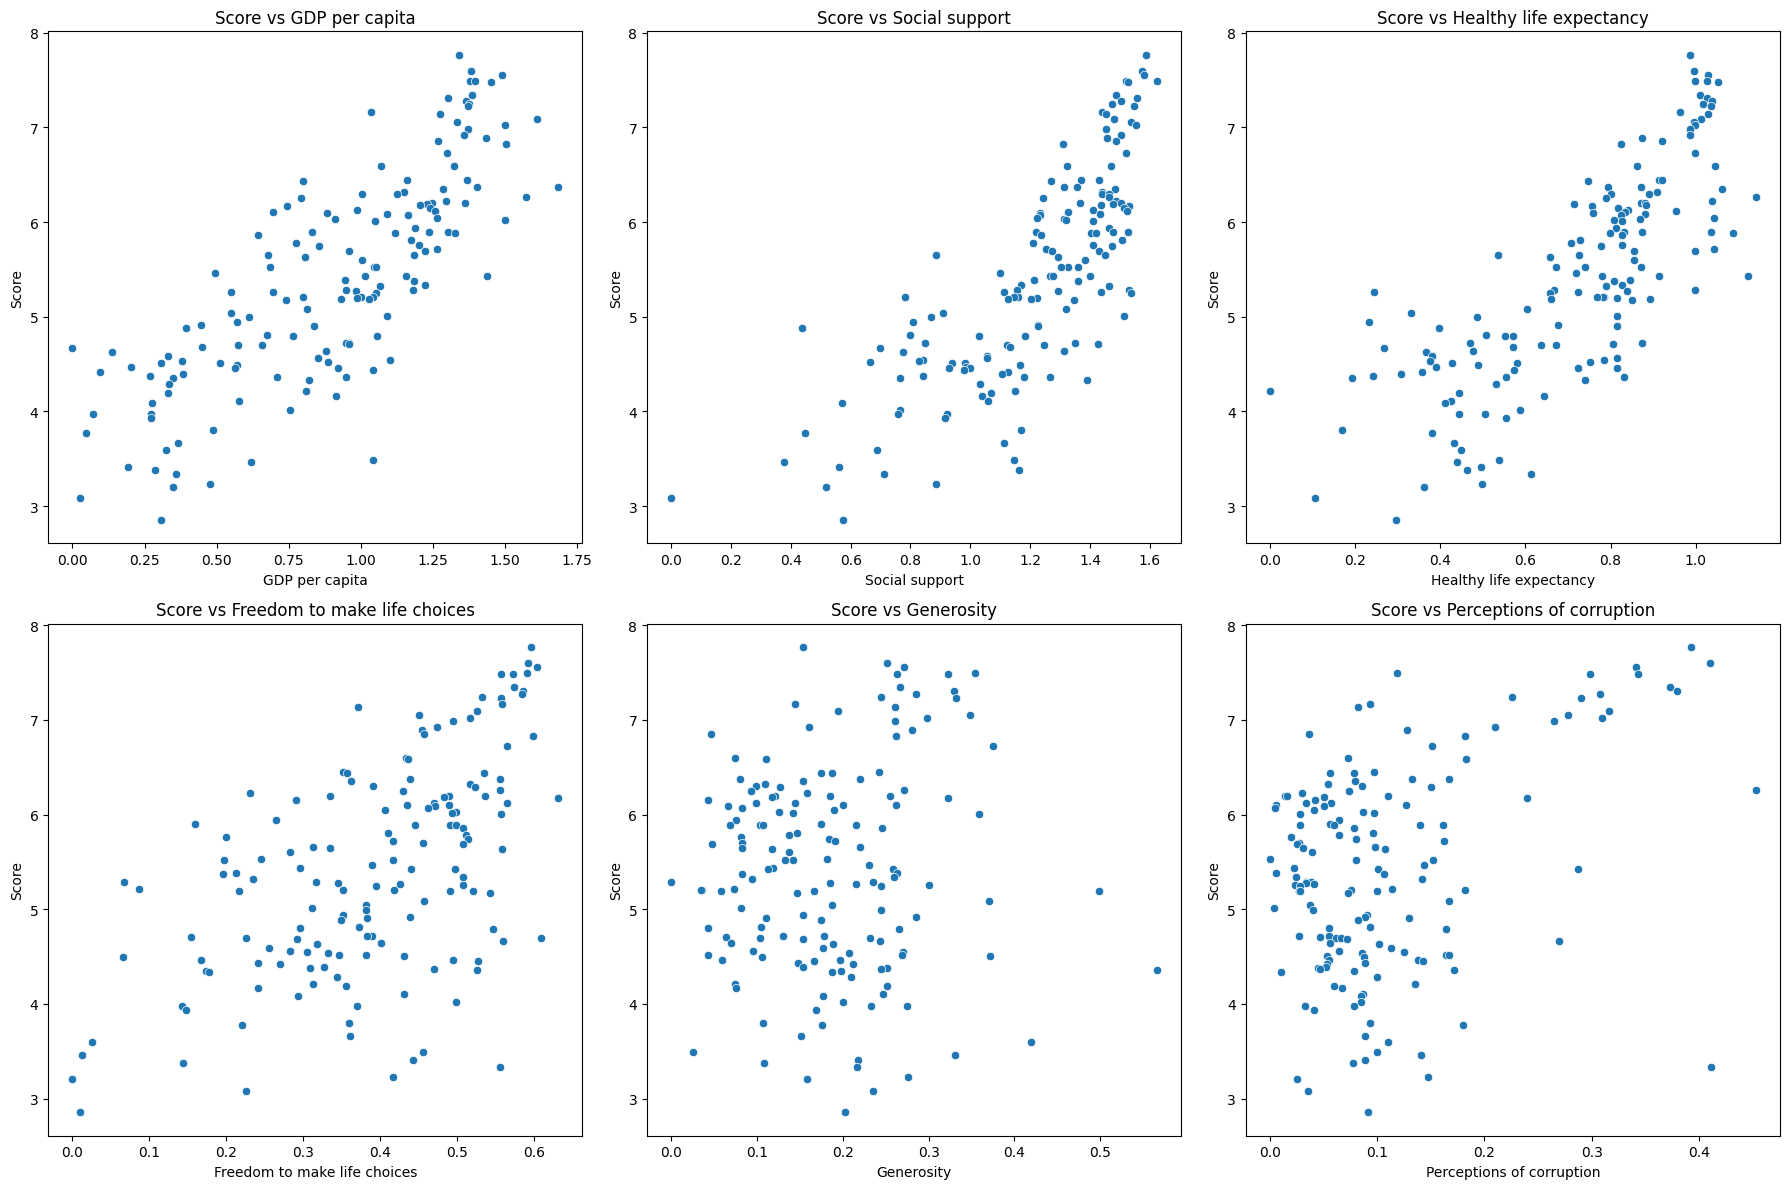

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, factor in enumerate(factores):
    ax = axes[i//3, i%3]
    sns.scatterplot(data=happiness, x=factor, y='Score', ax=ax)
    ax.set_title(f'Score vs {factor}')

plt.tight_layout()
plt.show()


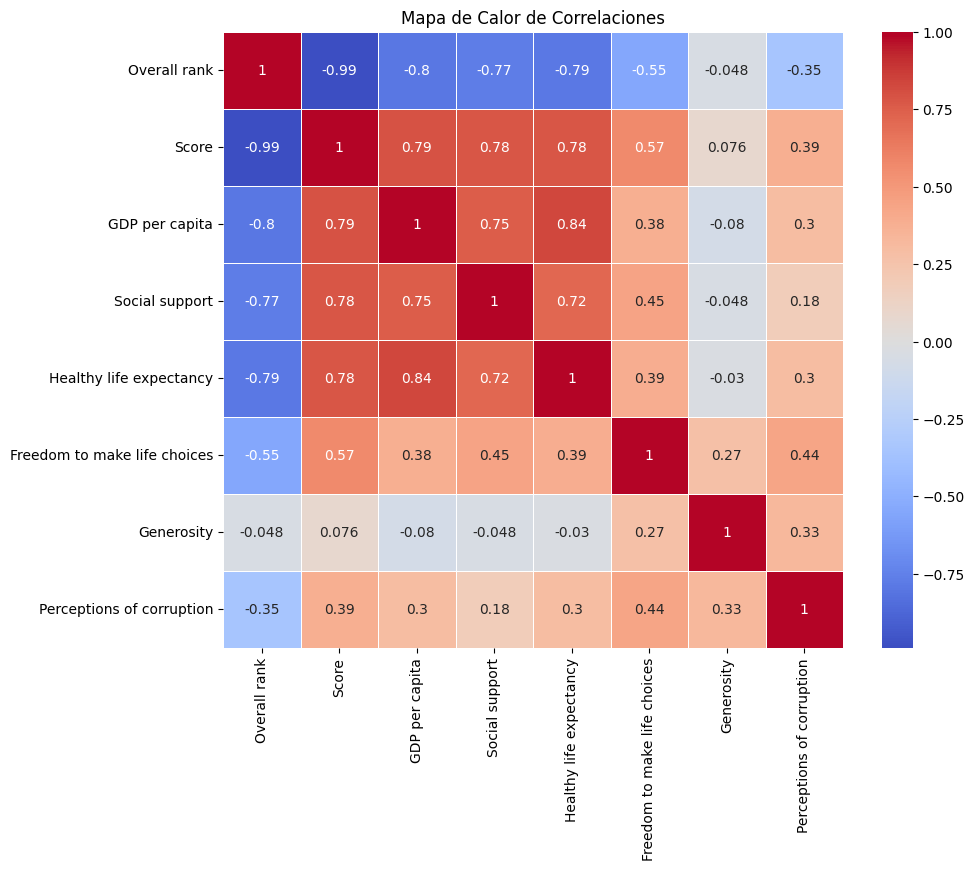

In [10]:
# Seleccionar las columnas relevantes para calcular la correlación
columnas_correlacion = ['Overall rank', 'Score', 'GDP per capita', 'Social support',
                        'Healthy life expectancy', 'Freedom to make life choices',
                        'Generosity', 'Perceptions of corruption']

# Calcular la matriz de correlaciones
correlaciones = happiness[columnas_correlacion].corr()

# Crear el heatmap con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Mapa de Calor de Correlaciones')
plt.show()



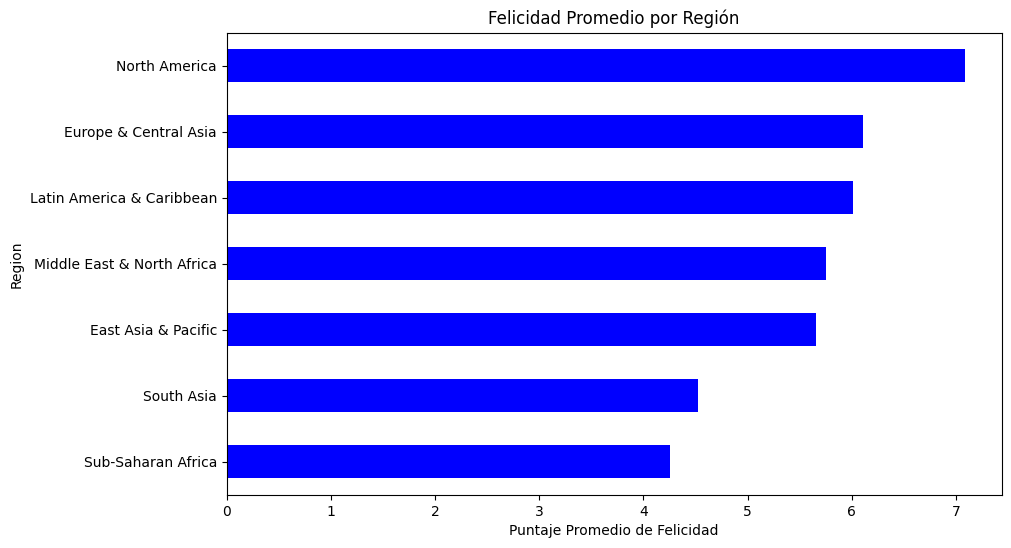

In [12]:
# Fusionar los dataframes por las columnas correspondientes
merged = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName')

# Agrupar por región y calcular la felicidad promedio
felicidad_por_region = merged.groupby('Region')['Score'].mean().sort_values()

# Gráfica de barras horizontales
plt.figure(figsize=(10, 6))
felicidad_por_region.plot(kind='barh', color='blue')
plt.title('Felicidad Promedio por Región')
plt.xlabel('Puntaje Promedio de Felicidad')
plt.show()
